In [2]:
import tensorflow as tf
import os
import random
import numpy as np

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard

import time
import random
import segmentation_models as sm

AttributeError: module 'keras.utils' has no attribute 'generic_utils'

In [4]:
print(tf.__version__)

2.4.0


In [5]:
# Initialise the input image dimensions and the number of colour channels
# X-ray images are greyscale so they we require only one colour channel
IMG_WIDTH = 1024
IMG_HEIGHT = 1024
IMG_CHANNELS = 1

In [6]:
# Initialise numpy arrays for X_data and Y_data to store the input images
X_data = np.zeros((180, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
Y_data = np.zeros((180, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

In [7]:
# Here the 180 images are loaded into numpy arrays with shape (180, 1024, 1024, 1)
# For each 1024 by 1024 matrix, each element in the matrix corresponds to the pixel value in the .tif image
# Load 1mm images into X_data
for i in range(10):
    img = imread(('1 mm/32p1r00' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    X_data[i] = img
    
for i in range(10,100):
    img = imread(('1 mm/32p1r0' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    X_data[i] = img
    
for i in range(10):
    img = imread(('1 mm/32p1r10' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    X_data[100+i] = img
    
for i in range (10,80):
    img = imread(('1 mm/32p1r1' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    X_data[100+i] = img
    
    
# Load 0mm data into Y_data
for i in range(10):
    img = imread(('0 mm/32p0r00' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    Y_data[i] = img
    
for i in range(10,100):
    img = imread(('0 mm/32p0r0' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    Y_data[i] = img
    
for i in range(10):
    img = imread(('0 mm/32p0r10' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    Y_data[100+i] = img
    
for i in range (10,80):
    img = imread(('0 mm/32p0r1' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    Y_data[100+i] = img

In [8]:
# Assign the first 170 images in X_data and Y_data to X_train and Y_train respectively 
# and the last 10 images to X_test and Y_test
TRAIN_NUM = 170
X_train = X_data[0:TRAIN_NUM]
X_test = X_data[TRAIN_NUM:]
Y_train = Y_data[0:TRAIN_NUM]
Y_test = Y_data[TRAIN_NUM:]

In [9]:
print(np.amax(X_train))
print(np.amin(X_train))

1.0778287649154663
0.9167473316192627


In [10]:
print(np.amax(Y_train))
print(np.amin(Y_train))

1.0
0.9252259731292725


In [11]:
# Stretch X_train and Y_train and assign to X_train_stretch and Y_train_stretch respectively
X_train_temp = np.subtract(X_train,0.9)
X_train_stretch = np.multiply(X_train_temp,10)

Y_train_temp = np.subtract(Y_train,0.9)
Y_train_stretch = np.multiply(Y_train_temp,10)

X_test_temp = np.subtract(X_test,0.9)
X_test_stretch = np.multiply(X_test_temp,10)

In [12]:
print(np.amax(X_train_stretch))
print(np.amin(X_train_stretch))

1.7782876491546629
0.16747331619262673


In [13]:
print(np.amax(Y_train_stretch))
print(np.amin(Y_train_stretch))

0.9999999999999998
0.2522597312927244


In [14]:
random.seed(a=8, version=2)

In [15]:
rand_train = random.randint(0, len(X_train)-1)

/home/andrew/anaconda3/envs/tensorflow/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/home/andrew/anaconda3/envs/tensorflow/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


<function matplotlib.pyplot.show(close=None, block=None)>

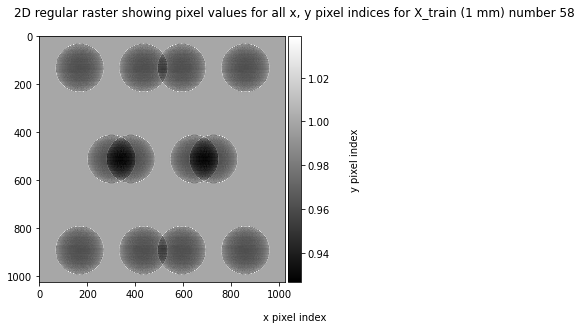

In [16]:
imshow(np.squeeze(X_train[rand_train]), cmap='gray')
plt.title('2D regular raster showing pixel values for all x, y pixel indices for X_train (1 mm) number ' 
          + str(rand_train), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

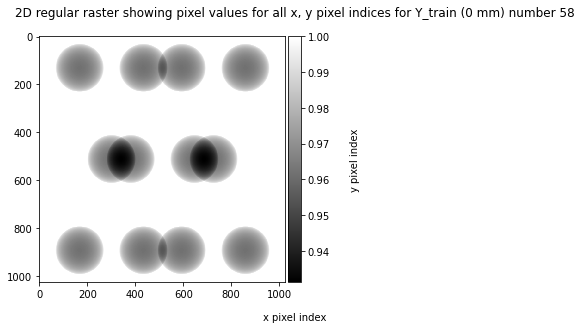

In [17]:
imshow(np.squeeze(Y_train[rand_train]), cmap='gray')
plt.title('2D regular raster showing pixel values for all x, y pixel indices for Y_train (0 mm) number ' 
          + str(rand_train), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

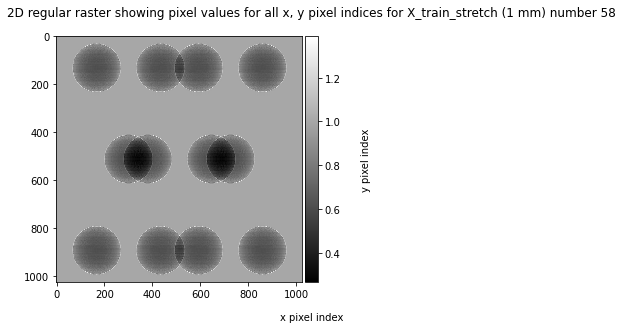

In [18]:
imshow(np.squeeze(X_train_stretch[rand_train]), cmap='gray')
plt.title('2D regular raster showing pixel values for all x, y pixel indices for X_train_stretch (1 mm) number ' 
          + str(rand_train), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.show

In [19]:
rand_test = random.randint(0, len(X_test)-1)

<function matplotlib.pyplot.show(close=None, block=None)>

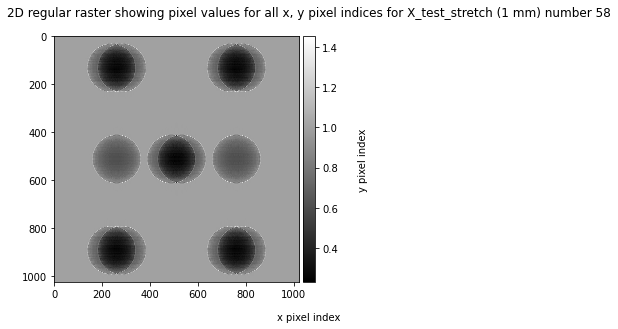

In [20]:
imshow(np.squeeze(X_test_stretch[rand_test]), cmap='gray')
plt.title('2D regular raster showing pixel values for all x, y pixel indices for X_test_stretch (1 mm) number ' 
          + str(rand_train), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.show

In [21]:
model = sm.Unet(input_shape=(1024, 1024, 1), encoder_weights=None)
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 1024, 1024, 6 640         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 1024, 1024, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 512, 512, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

In [22]:
NAME = "vgg19-unet{}".format(int(time.time()))

In [23]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [24]:
#Callbacks
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
        tensorboard]

In [25]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [26]:
with tf.device("/device:GPU:0"):
    results = model.fit(X_train_stretch, Y_train_stretch, validation_split=0.1, batch_size=1, epochs=10, callbacks=callbacks)
model.save(os.path.join("models", NAME))

Epoch 1/10
153/153 [==============================] - 177s 276ms/step - loss: 0.4996 - iou_score: 0.7851 - val_loss: 0.5630 - val_iou_score: 0.9081
Epoch 2/10
153/153 [==============================] - 42s 271ms/step - loss: 0.2853 - iou_score: 0.8888 - val_loss: 0.3582 - val_iou_score: 0.8992
Epoch 3/10
153/153 [==============================] - 42s 273ms/step - loss: 0.2856 - iou_score: 0.8896 - val_loss: 0.4405 - val_iou_score: 0.9060
Epoch 4/10
153/153 [==============================] - 42s 276ms/step - loss: 0.2787 - iou_score: 0.8922 - val_loss: 0.3187 - val_iou_score: 0.8923
Epoch 5/10
153/153 [==============================] - 42s 277ms/step - loss: 0.2803 - iou_score: 0.8918 - val_loss: 0.3092 - val_iou_score: 0.8864
Epoch 6/10
153/153 [==============================] - 42s 277ms/step - loss: 0.2802 - iou_score: 0.8918 - val_loss: 0.3112 - val_iou_score: 0.8830
Epoch 7/10
153/153 [==============================] - 43s 278ms/step - loss: 0.2804 - iou_score: 0.8918 - val_loss: 0

In [78]:
#model = tf.keras.models.load_model('models/vgg19-unet1612865160', {'iou_score': sm.metrics.iou_score}, compile=False)

In [53]:
X_predict_stretch = model.predict(
    X_test_stretch, batch_size=None, verbose=1, steps=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)

1/1 [==============================] - 1s 1s/step


/home/andrew/anaconda3/envs/tensorflow/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/home/andrew/anaconda3/envs/tensorflow/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


<function matplotlib.pyplot.show(close=None, block=None)>

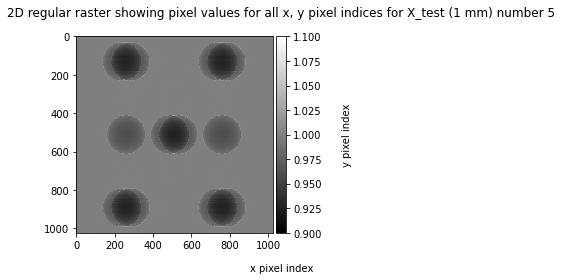

In [54]:
imshow(np.squeeze(X_test[rand_test]), cmap='gray', vmin = 0.9, vmax=1.1)
plt.title('2D regular raster showing pixel values for all x, y pixel indices for X_test (1 mm) number ' 
          + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

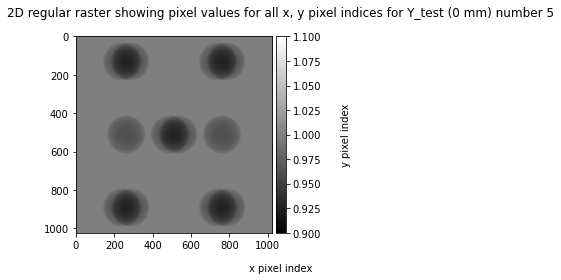

In [55]:
imshow(np.squeeze(Y_test[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)
plt.title('2D regular raster showing pixel values for all x, y pixel indices for Y_test (0 mm) number ' 
          + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.tight_layout()
plt.show

In [56]:
# Invert the stretch operation
X_predict_temp = np.divide(X_predict_stretch,10)
X_predict = np.add(X_predict_temp,0.9)

<function matplotlib.pyplot.show(close=None, block=None)>

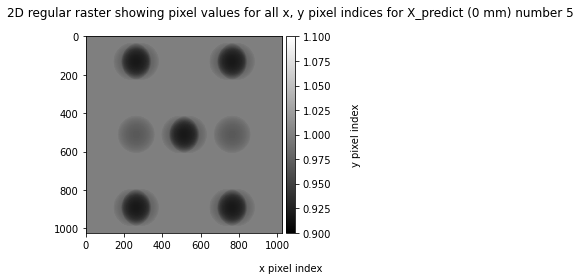

In [57]:
imshow(np.squeeze(X_predict[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)
plt.title('2D regular raster showing pixel values for all x, y pixel indices for X_predict (0 mm) number ' 
          + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.tight_layout()
plt.show

# 1D line plots for y = 512

<function matplotlib.pyplot.show(close=None, block=None)>

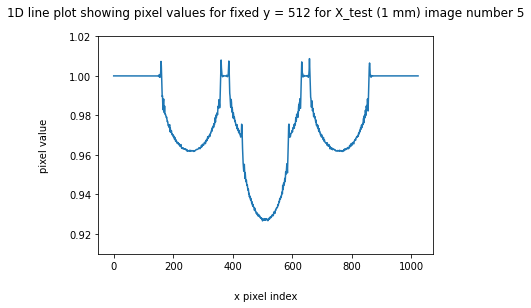

In [69]:
line = X_test[rand_test,512]
plt.plot(np.squeeze(line))
plt.title('1D line plot showing pixel values for fixed y = 512 for X_test (1 mm) image number ' 
          + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=20)
plt.ylabel('pixel value', labelpad=20)
plt.ylim([0.91, 1.02])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

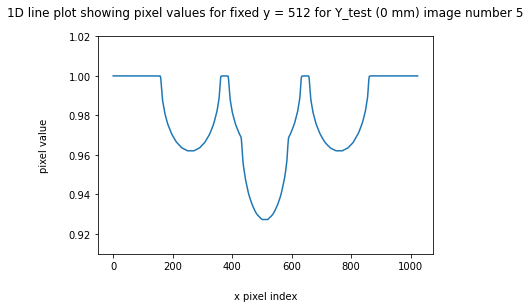

In [68]:
line = Y_test[rand_test,512]
plt.plot(np.squeeze(line))
plt.title('1D line plot showing pixel values for fixed y = 512 for Y_test (0 mm) image number ' + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=20)
plt.ylabel('pixel value', labelpad=20)
plt.ylim([0.91, 1.02])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

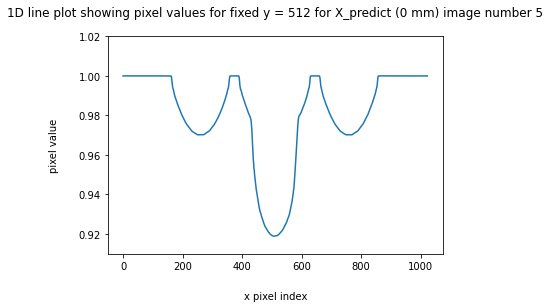

In [67]:
line = X_predict[rand_test,512]
plt.plot(np.squeeze(line))
plt.title('1D line plot showing pixel values for fixed y = 512 for X_predict (0 mm) image number ' + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=20)
plt.ylabel('pixel value', labelpad=20)
plt.ylim([0.91, 1.02])
plt.show

# 1D line plots for x = 256

<function matplotlib.pyplot.show(close=None, block=None)>

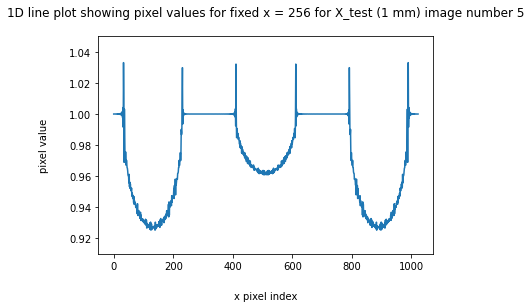

In [76]:
line = X_test[rand_test,:,256]
plt.plot(np.squeeze(line))
plt.title('1D line plot showing pixel values for fixed x = 256 for X_test (1 mm) image number ' 
          + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=20)
plt.ylabel('pixel value', labelpad=20)
plt.ylim([0.91, 1.05])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

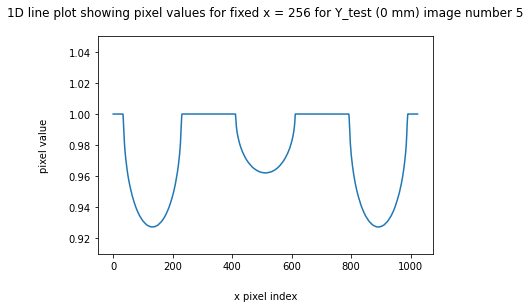

In [75]:
line = Y_test[rand_test,:,256]
plt.plot(np.squeeze(line))
plt.title('1D line plot showing pixel values for fixed x = 256 for Y_test (0 mm) image number ' + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=20)
plt.ylabel('pixel value', labelpad=20)
plt.ylim([0.91, 1.05])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

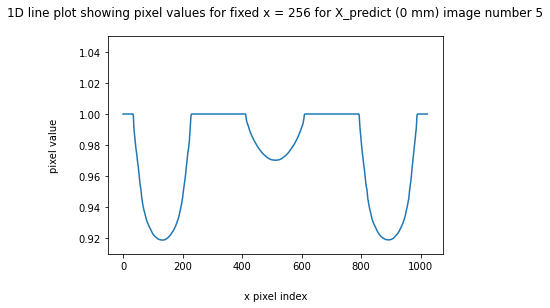

In [77]:
line = X_predict[rand_test,:,256]
plt.plot(np.squeeze(line))
plt.title('1D line plot showing pixel values for fixed x = 256 for X_predict (0 mm) image number ' + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=20)
plt.ylabel('pixel value', labelpad=20)
plt.ylim([0.91, 1.05])
plt.show